In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse


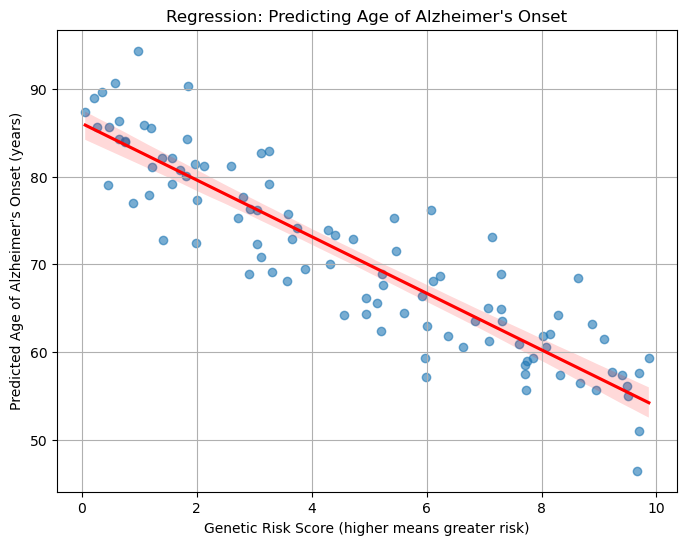

In [27]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n = 100
genetic_risk_score = np.random.uniform(0, 10, n)
age_onset = 85 - 3 * genetic_risk_score + np.random.normal(0, 5, n)
data = pd.DataFrame({
    'Genetic Risk Score': genetic_risk_score,
    'Predicted Age of Alzheimer\'s Onset': age_onset
})

# Plot regression
plt.figure(figsize=(8,6))
sns.regplot(x='Genetic Risk Score', y='Predicted Age of Alzheimer\'s Onset', data=data, 
            line_kws={'color':'red'}, scatter_kws={'alpha':0.6})

plt.title('Regression: Predicting Age of Alzheimer\'s Onset')
plt.xlabel('Genetic Risk Score (higher means greater risk)')
plt.ylabel('Predicted Age of Alzheimer\'s Onset (years)')
plt.grid(True)

plt.savefig("regression_ad_onset.png")
plt.show()

/var/folders/0z/8vp_hjgs17jffqq8sgthf87h0000gn/T/ipykernel_74467/4015612463.py:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


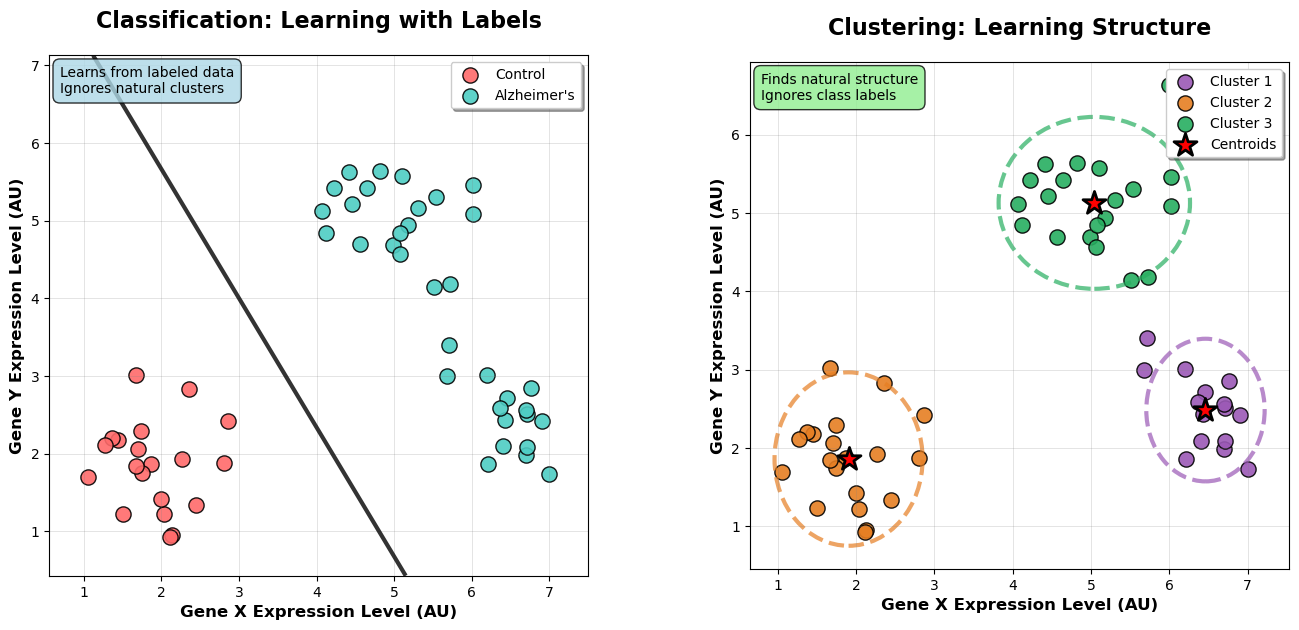

In [29]:
# Create synthetic data: 2 classes but with 3 natural clusters
np.random.seed(42)
class_1_cluster1 = np.random.multivariate_normal([2, 2], [[0.3, 0], [0, 0.3]], 20)
class_2_cluster1 = np.random.multivariate_normal([5, 5], [[0.4, 0.1], [0.1, 0.4]], 20)
class_2_cluster2 = np.random.multivariate_normal([6.5, 2.5], [[0.3, -0.1], [-0.1, 0.3]], 15)

X = np.vstack((class_1_cluster1, class_2_cluster1, class_2_cluster2))
y = np.array([0]*20 + [1]*20 + [1]*15)  # True labels: 2 classes total

# Classification model
clf = LogisticRegression(random_state=42)
clf.fit(X, y)

# Meshgrid for decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)

# KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Figure setup
fig = plt.figure(figsize=(16, 7))
gs = fig.add_gridspec(1, 2, hspace=0.3, wspace=0.3)

colors = ['#FF6B6B', '#4ECDC4']  # Modern red and teal
bg_colors = ['#FFE5E5', '#E5F9F6']  # Light versions

# Classification plot
ax1 = fig.add_subplot(gs[0, 0])

decision_boundary = ax1.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=3, alpha=0.8)

class_names = ['Control', 'Alzheimer\'s']
for i, color in enumerate(colors):
    mask = y == i
    ax1.scatter(X[mask, 0], X[mask, 1], c=color, s=120, alpha=0.9, 
               edgecolors='black', linewidth=1, label=class_names[i])

ax1.set_title('Classification: Learning with Labels', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Gene X Expression Level (AU)', fontsize=12, fontweight='semibold')
ax1.set_ylabel('Gene Y Expression Level (AU)', fontsize=12, fontweight='semibold')

ax1.text(0.02, 0.98, 'Learns from labeled data\nIgnores natural clusters', 
         transform=ax1.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))

ax1.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)
ax1.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
ax1.set_facecolor('white')
ax1.set_aspect('equal')

# Clustering plot
ax2 = fig.add_subplot(gs[0, 1])
cluster_colors = ['#9B59B6', '#E67E22', '#27AE60']  # Purple, orange, green

for i, color in enumerate(cluster_colors):
    mask = y_kmeans == i
    ax2.scatter(X[mask, 0], X[mask, 1], c=color, s=120, alpha=0.9,
               edgecolors='black', linewidth=1, label=f'Cluster {i+1}')

ax2.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', 
           marker='*', edgecolors='black', linewidth=2, label='Centroids', zorder=5)

for i, (centroid, color) in enumerate(zip(centroids, cluster_colors)):
    # Calculate cluster spread for ellipse size
    cluster_points = X[y_kmeans == i]
    if len(cluster_points) > 1:
        std_x = np.std(cluster_points[:, 0])
        std_y = np.std(cluster_points[:, 1])
        
        ellipse = Ellipse(centroid, width=std_x*4, height=std_y*4, 
                         edgecolor=color, facecolor='none', linewidth=3, 
                         alpha=0.7, linestyle='--')
        ax2.add_patch(ellipse)

ax2.set_title('Clustering: Learning Structure', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Gene X Expression Level (AU)', fontsize=12, fontweight='semibold')
ax2.set_ylabel('Gene Y Expression Level (AU)', fontsize=12, fontweight='semibold')

ax2.text(0.02, 0.98, 'Finds natural structure\nIgnores class labels', 
         transform=ax2.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.8))

ax2.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)
ax2.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
ax2.set_facecolor('white')
ax2.set_aspect('equal')

plt.tight_layout()
plt.subplots_adjust(top=0.88)

plt.savefig("classification_vs_clustering.png")
plt.show()